<a href="https://colab.research.google.com/github/Vixuz144/Simulaci-n-2/blob/main/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. a)Calcule el valor esperado de $θ_1$ y muestre que es un estimador insesgado.

Sean:
$$ I = \int_a^b g(x) $$
$$ \hat{p} = \frac{N_H}{N} $$
$$ I ≈ \theta_1 = c(b-a)\frac{N_H}{N} $$

donde:

$ N_H $ es el número de aciertos y
$ E\left[ \hat{p} \right] = p $, con $ p = \frac{I}{c(b-a)} $

De esta manera, al calcular el valor esperado de $θ_1$

$$ E\left[ \theta_1 \right] = E\left[ c(b-a)\frac{N_H}{N} \right] = E\left[ c(b-a) \hat{p} \right] = c(b-a) E\left[ \hat{p} \right] = c(b-a) p  = c(b-a) \frac{I}{c(b-a)} = I $$

Por lo tanto, $ E\left[ \theta_1 \right] = I $. De manera que es insesgada.

b) Calcule la varianza del estimador $θ_1$.

$$ Var\left[ \theta_1 \right] = Var\left[ c(b-a)\frac{N_H}{N} \right] = c^2(b-a)^2Var\left[ \frac{N_H}{N} \right] = c^2(b-a)^2Var\left[ \hat{p} \right] $$

Como $\hat{p}$ esta distribuido bernoulli con parámetro p, se sabe que $ Var\left[ \hat{p} \right] = p(1-p) $. De manera que:

$$ Var\left[ \theta_1 \right] = c^2(b-a)^2Var\left[ \hat{p} \right] = c^2(b-a)^2 (p(1-p)) = c^2(b-a)^2 \left(\frac{I}{c(b-a)} \left(1-\frac{I}{c(b-a)}\right) \right) = c(b-a)I\left(1-\frac{I}{c(b-a)}\right) = I\left(c(b-a) - I\right) $$

Por lo tanto, $ Var\left[ \theta_1 \right] = I\left(c(b-a) - I\right) $.

2. a) Calcule la desviación estándar e interprete el resultado en términos de la precisión del estimador.


b) ¿Cuál debe ser el valor de N para que la precisión de la estimación $θ_1$ sea de 0.01
y 0.001?

3. Escriba un programa en Python que implemente el Algoritmo del Método Monte Carlo de Acierto y Error

4. Retome el ejemplo de la estimación del número π y grafique el estimador versus N
para identificar el estado estable y el estado transitorio de la simulación.
5. Use el método de Acierto y Error para estimar las integrales:

a) $\int_0^1 e^{e^x}dx$

b) $\int_0^1 (1 - x^2)^{\frac{3}{2}}dx$

3.18 

Media (mejor aproximación de pi) = 3.1450800000000005
Varianza = 2.4437936000000034e-05


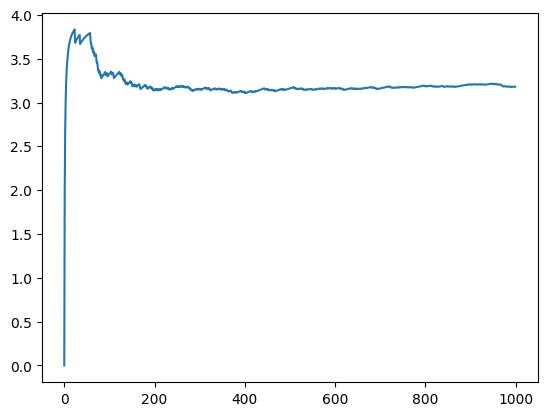

In [186]:
from numpy.random import random as rd
import numpy as np
import matplotlib .pyplot as plt

def integ_ae(n, f, a, b, c, p):
  cuenta = 0
  l = list()
  for i in range(n):
    r_1, r_2 = rd(), rd()
    x = a + r_1 * (b-a)
    if  f(x) > c*r_2:
      cuenta +=1
    if i%p == 0:
      l.append(c * (b-a) * cuenta/(i+1))
  return l

if __name__ == "__main__":
  n = 1000

  a = 0
  b = 1

  f = lambda x: np.sqrt(1 - x**2)

  c = max(f(a), f(b))
  paso = 1

  i = integ_ae(n, f, a, b, c, paso)
  pi = 4*np.array(i)
  print(pi[-1],"\n")
  plt.plot(pi)

  m = 100
  lista_pi = []
  for i in range(m):
    cosa = 4*np.array(integ_ae(n, f, a, b, c, n-1))
    lista_pi.append(float(cosa[-1]))

  print("Media (mejor aproximación de pi) =", np.mean(lista_pi))
  #print(np.var(lista_pi))
  print("Varianza =", np.var(lista_pi) / m)


Ejercicio 5
6.419345485490616 
 0.5838


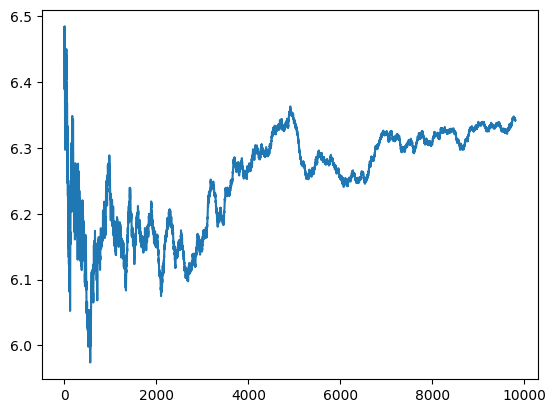

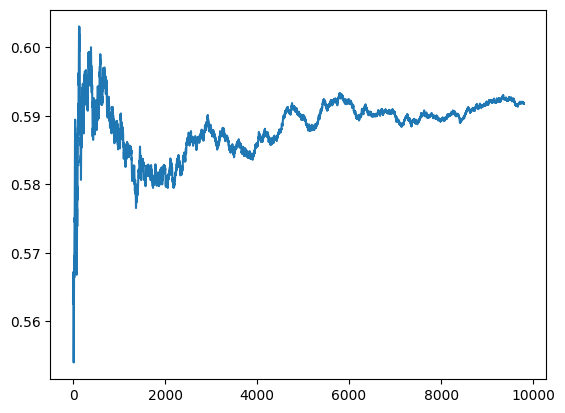

In [181]:
from numpy.random import random as rd
import numpy as np
import matplotlib .pyplot as plt


def integ_np(n, f, a, b, c):
  r = rd((2,n))
  x = a + r[0,:]*(b - a)
  u = f(x) > c*r[1,:]
  return c * (b-a) *list(u).count(True) / n

def integ(n, f, a, b, c, p):
  cuenta = 0
  l = list()
  for i in range(n):
    r_1, r_2 = rd(), rd()
    x = a + r_1 * (b-a)
    if  f(x) > c*r_2:
      cuenta +=1
    if i%p == 0:
      l.append(c * (b-a) * cuenta/(i+1))
  return l


if __name__ == '__main__':
  n = 10**4
  a = 0
  b = 1

  print("\nEjercicio 5")
  g = lambda x: np.exp(np.exp(x))
  cg = max(g(1), g(0))
  i_g = integ_np(n, g, a, b, cg)

  h = lambda x: (1-x**2)**1.5
  ch = max(h(0), h(1))
  i_h = integ_np(n, h, a, b, ch)

  print(i_g, "\n" ,i_h)


  paso = 1

  l_g = integ(n, g, a, b, cg, paso)
  l_h = integ(n, h, a, b, ch, paso)

  inicio_grafica = 2*i

  plt.figure()
  plt.plot(l_g[inicio_grafica:])

  plt.figure()
  plt.plot(l_h[inicio_grafica:])